In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("EV_cars.csv")

In [3]:
df.head(5)

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


## EDA

In [4]:
df.duplicated().any()


np.False_

In [5]:
df.isna().sum()

Battery                  0
Car_name                 0
Car_name_link            0
Efficiency               0
Fast_charge              2
Price.DE.               51
Range                    0
Top_speed                0
acceleration..0.100.     0
dtype: int64

In [6]:
mean_fastcharge=df['Fast_charge'].mean(skipna=True)
mean_Price=df['Price.DE.'].mean(skipna=True)


In [7]:
df['Fast_charge'].fillna(mean_fastcharge,inplace=True)
df['Price.DE.'].fillna(mean_Price,inplace=True)

In [8]:
df.isna().sum()

Battery                 0
Car_name                0
Car_name_link           0
Efficiency              0
Fast_charge             0
Price.DE.               0
Range                   0
Top_speed               0
acceleration..0.100.    0
dtype: int64

In [9]:
df.describe()


,Battery,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,71.187500,195.175000,552.960894,67264.284790,369.694444,180.919444,7.288889
std,20.389849,31.909429,236.204089,31963.259735,107.315514,36.232023,3.005897
min,21.300000,137.000000,170.000000,22550.000000,135.000000,125.000000,2.100000
25%,57.500000,171.000000,360.000000,46997.500000,295.000000,155.750000,4.900000
50%,71.000000,188.000000,520.000000,60190.000000,380.000000,180.000000,6.750000
75%,85.000000,208.250000,680.000000,69950.000000,446.250000,200.000000,9.000000
max,123.000000,295.000000,1290.000000,218000.000000,685.000000,320.000000,19.100000


In [10]:
df.drop(columns=['Car_name','Car_name_link'],inplace=True)

In [11]:
df.head(5)

,Battery,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,172,670.0,59017.0,435,217,5.0
1,57.5,137,700.0,46220.0,420,201,6.1
2,60.5,183,370.0,44625.0,330,160,7.3
3,61.7,171,630.0,39990.0,360,160,7.9
4,75.0,149,780.0,55220.0,505,201,4.4


In [12]:
df.shape

(360, 7)

In [13]:
df.columns

Index(['Battery', 'Efficiency', 'Fast_charge', 'Price.DE.', 'Range',
       'Top_speed', 'acceleration..0.100.'],
      dtype='object')

In [14]:
cols=['Battery', 'Efficiency', 'Fast_charge', 'Price.DE.', 'Range',
       'Top_speed', 'acceleration..0.100.']

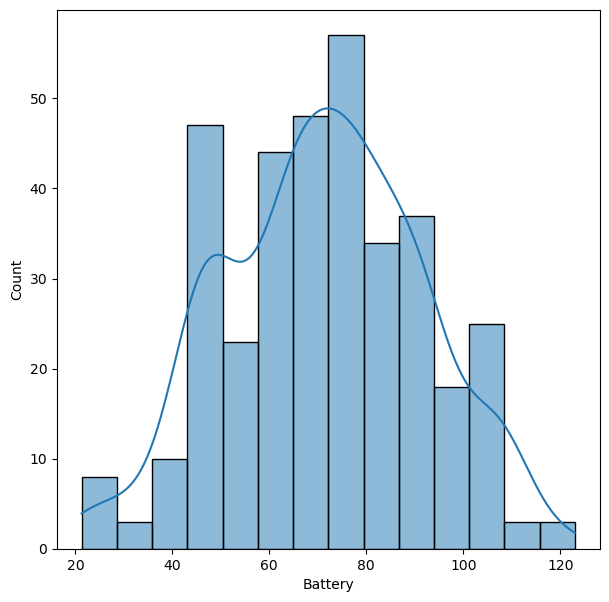

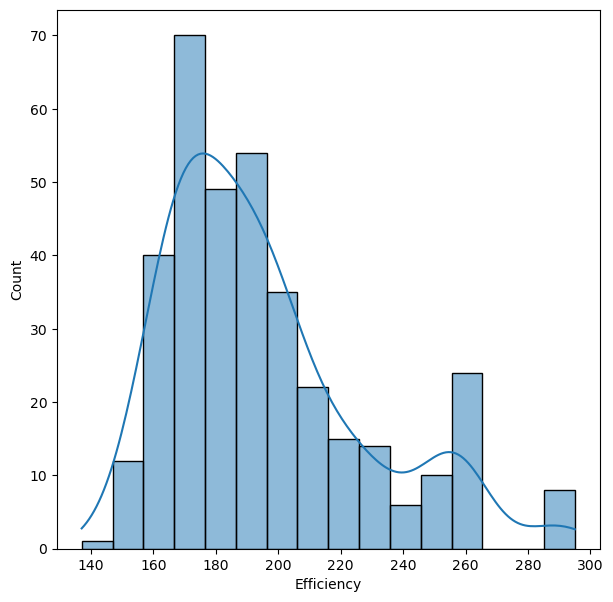

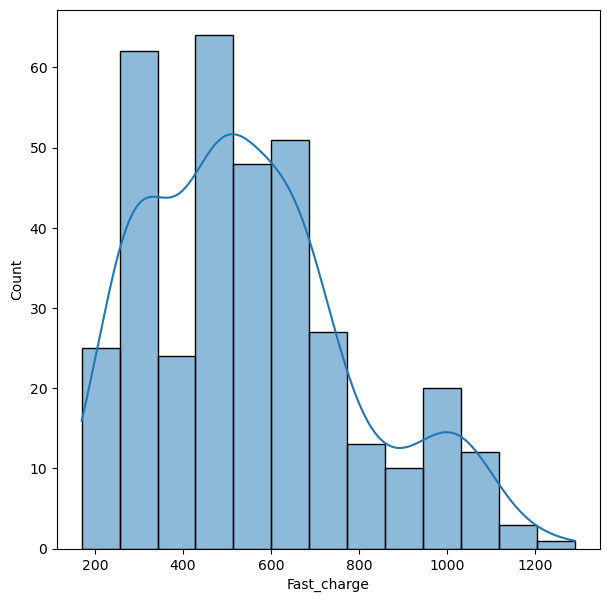

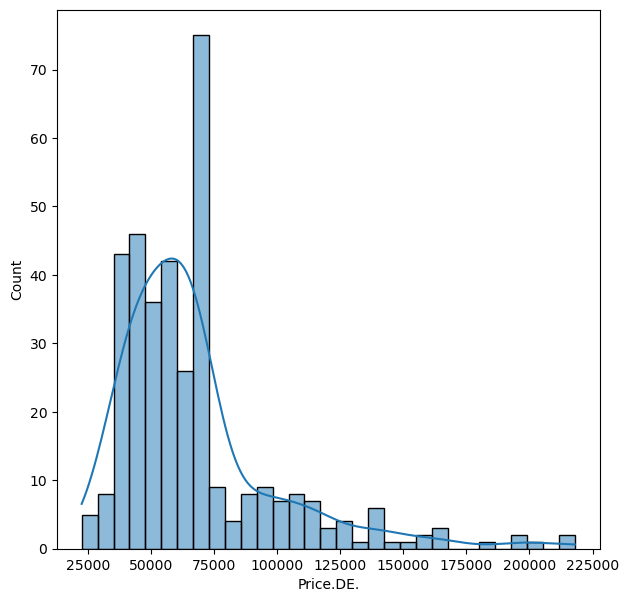

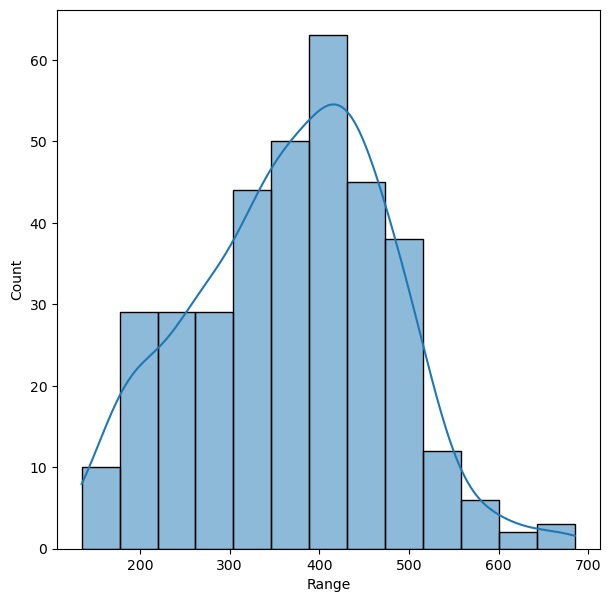

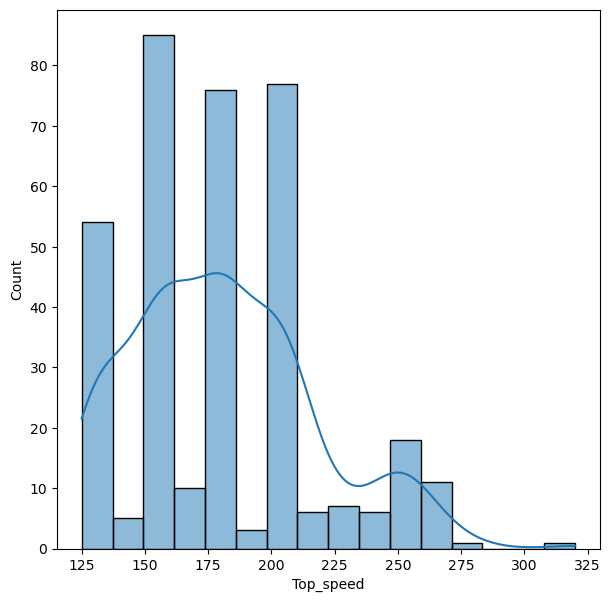

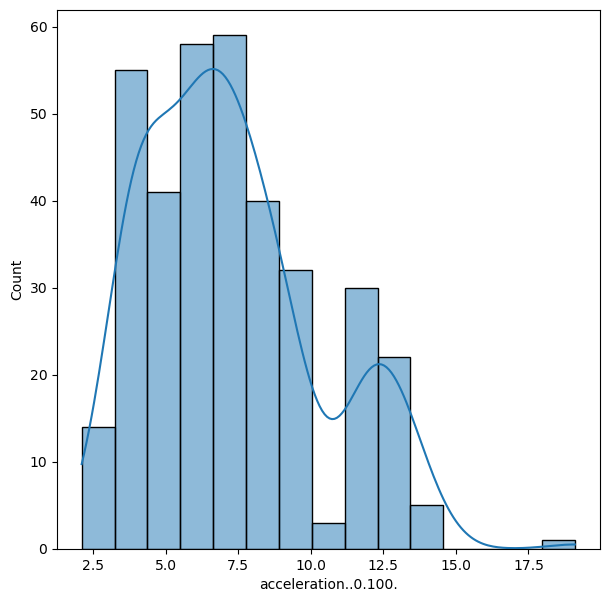

In [15]:
for col in cols:
    plt.figure(figsize=(7,7))
    sns.histplot(x=df[col],kde=True)

In [16]:
Q1 = df['Price.DE.'].quantile(0.25)
Q3 = df['Price.DE.'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Compute mean of non-outlier values
mean_value = df.loc[(df['Price.DE.'] >= lower_bound) & (df['Price.DE.'] <= upper_bound), 'Price.DE.'].mean()

# Replace outliers with mean
df['Price.DE.'] = np.where((df['Price.DE.'] < lower_bound) | (df['Price.DE.'] > upper_bound),
                       mean_value, df['Price.DE.'])

<Axes: xlabel='Price.DE.', ylabel='Count'>

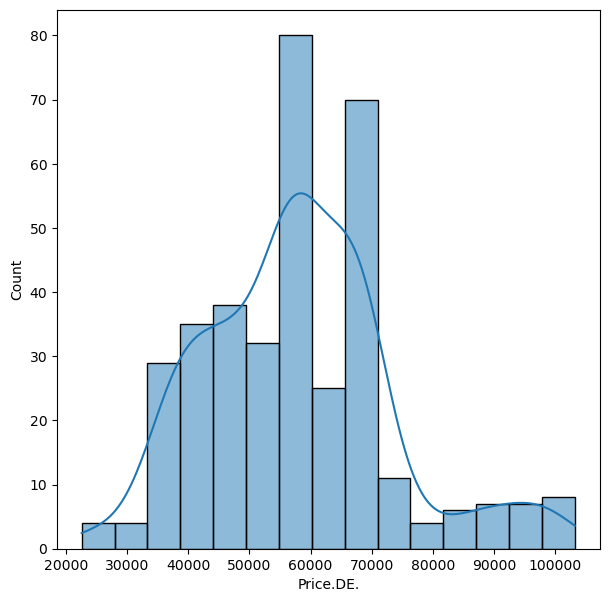

In [17]:
plt.figure(figsize=(7,7))
sns.histplot(x=df['Price.DE.'],kde=True)

## CO₂ Savings Estimation

To understand environmental impact, we estimate **how much CO₂ an electric vehicle (EV) saves** compared to a traditional **petrol (ICE)** car for the same distance.

### Assumptions:
- Average **petrol car emits ~150 g/km** of CO₂.  
- Average **EV indirectly causes ~80 g/km** CO₂ emissions from electricity generation.  
  *(This depends on how clean the power grid is.)*  

Thus, for every kilometer driven: 

CO₂ Saving per km = 150 - 80 = 70 { g/km}



To find total CO₂ saved over the EV’s full driving range:


CO₂ Savings (kg)} =(Range (km)×(CO₂ Saving per km ))/1000
	

We divide by 1000 to convert grams to kilograms.


In [18]:
# Average petrol car emission ~ 150 g/km
petrol_CO2_per_km = 150  # g/km

# Approximate CO₂ from EV electricity use depends on power source.
# Assume 80 g/km average from electricity generation.
ev_CO2_per_km = 80  # g/km

# So CO₂ saving per km = difference
co2_saving_per_km = petrol_CO2_per_km - ev_CO2_per_km  # 70 g/km
df['CO2_savings_total'] = df['Range'] * co2_saving_per_km / 1000  # in kg


In [19]:
df.head(5)

,Battery,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.,CO2_savings_total
0,75.0,172,670.0,59017.0,435,217,5.0,30.45
1,57.5,137,700.0,46220.0,420,201,6.1,29.40
2,60.5,183,370.0,44625.0,330,160,7.3,23.10
3,61.7,171,630.0,39990.0,360,160,7.9,25.20
4,75.0,149,780.0,55220.0,505,201,4.4,35.35


## Feature Dependency and Feature Selection

#### CO2 saving

In [32]:
df_CO2.columns

Index(['Battery', 'Efficiency', 'Fast_charge', 'Price.DE.', 'Range',
       'Top_speed', 'acceleration..0.100.', 'CO2_savings_total'],
      dtype='object')

In [33]:
from scipy.stats import pearsonr

# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target
selected_features = ['Battery', 'Efficiency', 'Fast_charge', 'Price.DE.', 'Range',
       'Top_speed', 'acceleration..0.100.']

correlations = {
    feature: pearsonr(df_CO2[feature], df_CO2['CO2_savings_total'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,Range,1.000000
0,Battery,0.881937
5,Top_speed,0.744192
2,Fast_charge,0.711559
3,Price.DE.,0.454681
1,Efficiency,-0.282097
6,acceleration..0.100.,-0.744583
